In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Absolute logits
df_neutral_abs = pd.read_csv("results/result_abs_neutral.csv")
df_0_abs = pd.read_csv("results/result_abs_zero.csv")
df_average_abs = pd.read_csv("results/result_abs_ave.csv")
df_maxdist_abs = pd.read_csv("results/result_abs_maxdist.csv")
df_pdata_abs = pd.read_csv("results/result_abs_pdata.csv")

df_neutral_abs = df_neutral_abs.drop(['Unnamed: 0'], axis=1)
df_0_abs = df_0_abs.drop(['Unnamed: 0'], axis=1)
df_average_abs = df_average_abs.drop(['Unnamed: 0'], axis=1)
df_maxdist_abs = df_maxdist_abs.drop(['Unnamed: 0'], axis=1)
df_pdata_abs = df_pdata_abs.drop(['Unnamed: 0'], axis=1)

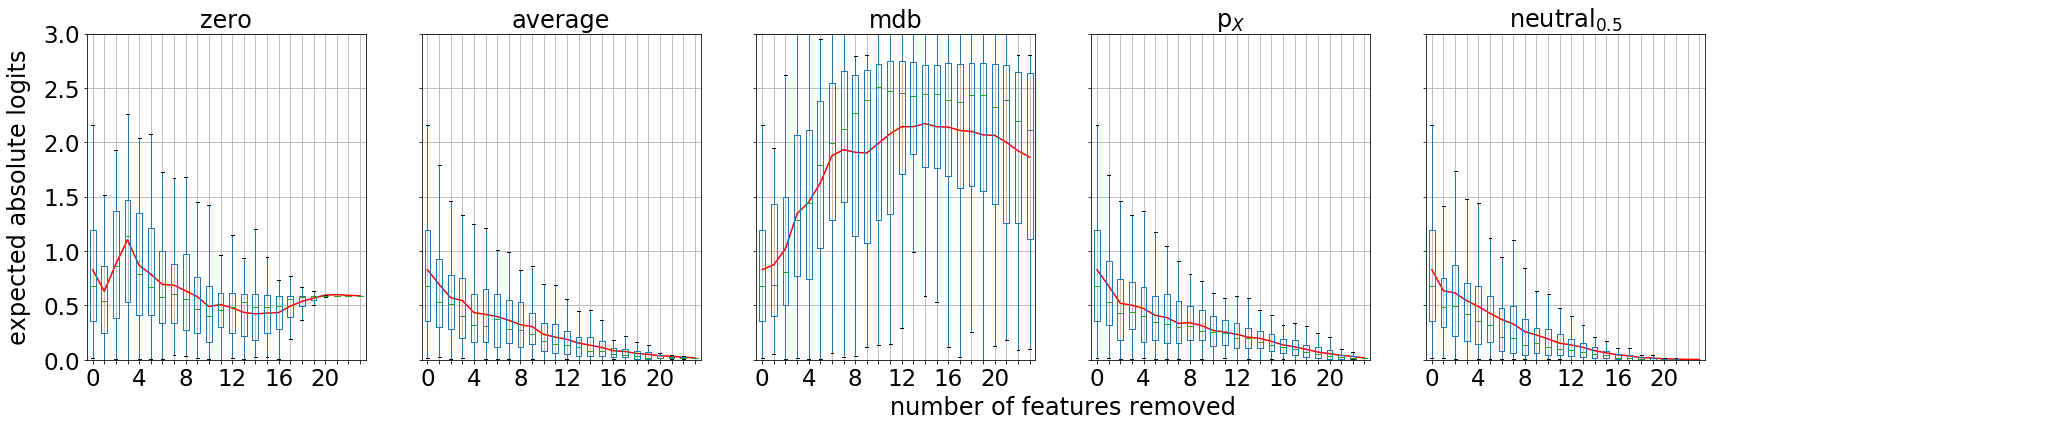

In [3]:
# Chart
fig = plt.figure(figsize=(35,6))
ax = fig.add_subplot(111) 
gs = fig.add_gridspec(1, 6)
ax11 = fig.add_subplot(gs[0, 0])
ax12 = fig.add_subplot(gs[0, 1])
ax13 = fig.add_subplot(gs[0, 2])
ax14 = fig.add_subplot(gs[0, 3])
ax15 = fig.add_subplot(gs[0, 4])
#ax16 = fig.add_subplot(gs[0, 5])

x_axis = list(range(1,np.size(df_0_abs,1)+1))

bottom = 0
top = 3
fontsize = 8

fontsize = 24
minus_font = 4

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
# Set common labels
ax.set_xlabel("number of features removed", fontsize = fontsize, labelpad=18)

ax11.plot(x_axis, df_0_abs[(df_0_abs!=np.inf)&df_0_abs.notnull()].mean(), 'r', linewidth=1.5)
ax11 = df_0_abs.plot.box(grid='True', title='zero', ax=ax11, sym='', fontsize=fontsize-1)
ax11.set_ylabel("expected absolute logits", fontsize=fontsize, labelpad=12)
ax11.title.set_fontsize(fontsize)
ax11.set_ylim((bottom, top)) 
for n, label in enumerate(ax11.yaxis.get_ticklabels()):
    if n % 1 != 0:
        label.set_visible(False)

every_nth = 4
for n, label in enumerate(ax11.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
ax12.plot(x_axis, df_average_abs[(df_average_abs!=np.inf)&df_average_abs.notnull()].mean(), 'r', linewidth=1.5)
ax12 = df_average_abs.plot.box(grid='True', title='average', ax=ax12, sym='', fontsize=fontsize-1)
ax12.title.set_fontsize(fontsize)
ax12.set_ylim((bottom, top)) 
ax12.set_yticklabels([])
for n, label in enumerate(ax12.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
ax13.plot(x_axis, df_maxdist_abs[(df_maxdist_abs!=np.inf)&df_maxdist_abs.notnull()].mean(), 'r', linewidth=1.5)
ax13 = df_maxdist_abs.plot.box(grid='True', title='mdb', ax=ax13, sym='', fontsize=fontsize-1)
ax13.title.set_fontsize(fontsize)
ax13.set_ylim((bottom, top)) 
ax13.set_yticklabels([])
for n, label in enumerate(ax13.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax14.plot(x_axis, df_pdata_abs[(df_pdata_abs!=np.inf)&df_pdata_abs.notnull()].mean(), 'r', linewidth=1.5)
ax14 = df_pdata_abs.plot.box(grid='True', title='p$_{X}$', ax=ax14, sym='', fontsize=fontsize-1)
ax14.title.set_fontsize(fontsize)
ax14.set_yticklabels([])
ax14.set_ylim((bottom, top)) 
for n, label in enumerate(ax14.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax15.plot(x_axis, df_neutral_abs[(df_neutral_abs!=np.inf)&df_neutral_abs.notnull()].mean(), 'r', linewidth=1.5)
ax15 = df_neutral_abs.plot.box(grid='True', title='neutral$_{0.5}$', ax=ax15, sym='', fontsize=fontsize-1)
ax15.title.set_fontsize(fontsize)
ax15.set_yticklabels([])
ax15.set_ylim((bottom, top)) 
for n, label in enumerate(ax15.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
fig.savefig('./plots/logits_cc.pdf', bbox_inches = "tight")

In [4]:
from sklearn import metrics
def assign_score_to_method(method_perf):
    x = np.linspace(0,len(method_perf)-1,len(method_perf))[::-1]
    _out = metrics.auc(x, method_perf)
    return _out

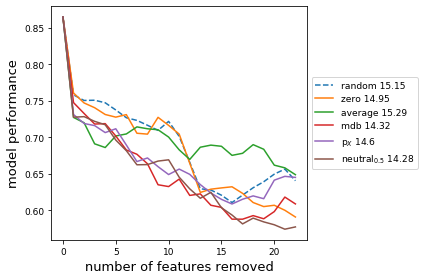

In [5]:
def comp_score(thiskey, df):
    return str(np.round(assign_score_to_method(df[thiskey]),2))

j = 'results_ROAR'
df = pd.read_csv('./results/' + j + '.csv')
df = df.rename(columns={"zero _perf": "zero", "ave _perf": "average", 
                        "neutral _perf": "neutral$_{0.5}$", 
                        "max dist _perf": "mdb", "pdata _perf": "p$_{X}$",
                        "random _perf": "random"})
cols = ['random', 'zero', 'average','mdb', 'p$_{X}$', 'neutral$_{0.5}$']
df = df[cols]

fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(1, 1)
xs = range(len(df))
ax1 = fig.add_subplot(gs[0, 0])
fontsize = 13
ax1.plot(xs, df['random'], linestyle ='dashed', label= 'random ' + comp_score(df.keys()[0], df))
ax1.plot(xs, df['zero'], label='zero '+ comp_score(df.keys()[1], df))
ax1.plot(xs, df['average'], label='average '+ comp_score(df.keys()[2], df))
ax1.plot(xs, df['mdb'], label='mdb '+ comp_score(df.keys()[3], df))
ax1.plot(xs, df['p$_{X}$'], label='p$_{X}$ '+ comp_score(df.keys()[4], df))
ax1.plot(xs, df['neutral$_{0.5}$'], label='neutral$_{0.5}$ '+ comp_score(df.keys()[5], df))
ax1.set_xlabel("number of features removed", fontsize = fontsize)
ax1.set_ylabel("model performance", fontsize = fontsize)
ax1.legend(loc='upper right',prop={'size': fontsize})
ax1.tick_params(axis="x", labelsize=fontsize - minus_font)
ax1.tick_params(axis="y", labelsize=fontsize - minus_font)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1, box.height])
# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize*0.7)

plt.tight_layout()

fig.savefig('./plots/'+j+'_cc.pdf')

plt.show()